### [K-Nearest Neighbors](https://en.wikipedia.org/wiki/Confusion_matrix)

Begin by importing and loading the digits dataset from [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

In [223]:
from sklearn.datasets import load_digits

In [224]:
digits = load_digits()

As you'd expect, this dataset contains 10 classes, or targets, one for each base-10 numeral. Each class contains approximately 180 samples.

Each sample has 64 total dimensions, or attributes, containing a value from 0-16. Effectively these attributes form an 8x8 bitmap matrix where the value represents a grayscale value from white black.

In [225]:
print("target_names:", digits.target_names)

target_names: [0 1 2 3 4 5 6 7 8 9]


In [226]:
print("data shape:", digits.data.shape)

data shape: (1797, 64)


In [227]:
print("images shape:", digits.images.shape)

images shape: (1797, 8, 8)


You can use matplotlib to visualize the images of each target.

In [228]:
import matplotlib.pyplot as plt

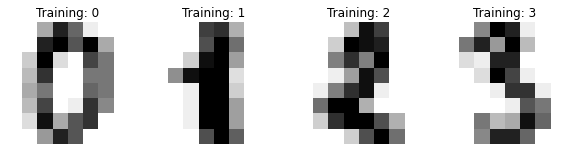

In [229]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In order to create our testing and training data we'll need to initialize a [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), the primary data structure used by pandas. A DataFrame only accepts 2-Dimensional data, our's is 3-Diminsonal so we'll have to flatten it first.

In [230]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

In [231]:
print("flattened attributes:", data.shape)

flattened attributes: (1797, 64)


In [232]:
import pandas as pd

df = pd.DataFrame(data, columns=digits.feature_names)

We'll add the targets to our DataFrame for the purposes of visualization.

In [233]:
df["target"] = digits.target

In [234]:
# display the frist 10 rows
df.head(10)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


Import the [classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method. The train_test_split method sections the data into training and testing data matricies ($X$) and target vectors ($y$). When you create these, drop the unnecessary columns from the DataFrame first (just the target column in this case).

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [236]:
X = df.drop(['target'], axis='columns')
y = df.target

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [238]:
print("X_train shape:", X_train.shape)

X_train shape: (1437, 64)


In [239]:
print("y_train shape:", y_train.shape)

y_train shape: (1437,)


Sidenote: Why is the standard notation to use a capital $X$ and lower case $y$? In linear algebra, it's convention to use capital Latin letters to represent matrices, and lower case Latin letters to represent vectors.

Now we finally train and use the classifier.

The n_neighbors parameter is the $k$ value. You can determine the optimal $k$ value via trial and error or use a sklearn's gridsearchcv method.

A $k$ value that's too small is susceptible to outliers, a $k$ value that's too large risks being outvoted by the wrong selection group. In general a smaller $k$ value is more optimal for structured data sets (such as this one) and a larger $k$ value is more optimal for noisy data sets. 

In [240]:
knn = KNeighborsClassifier(n_neighbors=7)

In [241]:
# train the classifer
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [242]:
# use the classifier and determine it's accuracy
print("accuracy:", knn.score(X_test, y_test))

accuracy: 0.9888888888888889


The following is a few different reports that can be used to visualize the classifier's accuracy.

To read a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), see where a given row and column intersect. This will tell you how many times, if any, a test sample (the row value) was predicted (the col value) incorrectly.

In [243]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

Text(42.0, 0.5, 'Truth')

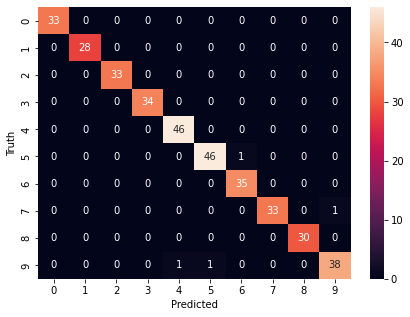

In [244]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [245]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

